Copyright @ cb_park@korea.ac.kr (Cheonbok Park), joonleesky@kaist.ac.kr (Hojoon Lee)

## Convolutional Neural Network

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as datasets
import torchvision.transforms as transforms

## Below are the all identical neural network with different expression

In [2]:
class CNN1(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN1, self).__init__()
        
        self.conv = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2)

    def forward(self, x):
        out = self.conv(x)
        out = self.relu(out)
        out = self.maxpool(out)
        return out  # input image = batch_size x 3 x 16 x 16

    
class CNN2(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN2, self).__init__()

        self.layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))

    def forward(self, x):
        out = self.layer(x)
        return out  # input image = batch_size x 3 x 16 x 16      
      

class CNN3(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN3, self).__init__()
        layer = []
        
        layer.append(nn.Conv2d(3, 64, kernel_size=3, padding=1))
        layer.append(nn.ReLU())
        layer.append(nn.MaxPool2d(2))
        
        self.layer = nn.Sequential(*layer)

    def forward(self, x):
        out = self.layer(x)
        return out  # input image = batch_size x 3 x 16 x 16

In [3]:
sample_image = Variable(torch.zeros(64, 3, 32, 32))

In [4]:
cnn = CNN1()
print(cnn)
output = cnn(sample_image)
print(output.size())

CNN1(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([64, 64, 16, 16])


In [5]:
cnn = CNN2()
print(cnn)
output = cnn(sample_image)
print(output.size())

CNN2(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)
torch.Size([64, 64, 16, 16])


In [6]:
cnn = CNN3()
print(cnn)
output = cnn(sample_image)
print(output.size())

CNN3(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)
torch.Size([64, 64, 16, 16])


### Let's practice creating the Convolutional Neural Network

In [15]:
class CNN_prac(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN_prac, self).__init__()
        self.conv1 = nn.Conv2d(3, 512, 3, 1, 1) 
        self.conv2 = nn.Conv2d(512, 256, 3, 1, 1) 
        self.conv3 = nn.Conv2d(256, 256, 3, 2, 1) 
        self.conv4 = nn.Conv2d(256, 256, 4, 4, 0) 

        self.linear = nn.Linear(256*4*4, 10)
    def forward(self, x):
        out=self.conv1(x)
        out=self.conv2(out)
        out=self.conv3(out)
        out=self.conv4(out)
        out = out.contiguous().view(-1, 256*4*4)
        out = self.linear(out)
        return out

In [16]:
cnn_prac=CNN_prac()
sample_image = Variable(torch.zeros(64, 3, 32, 32))
output=cnn_prac(sample_image)
print(output.size()) 
print(cnn_prac)

torch.Size([64, 256, 32, 32])
torch.Size([64, 256, 16, 16])
torch.Size([64, 10])
CNN_prac(
  (conv1): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(256, 256, kernel_size=(4, 4), stride=(4, 4))
  (linear): Linear(in_features=4096, out_features=10, bias=True)
)


## 2.1 VGG-19

### Let's create by yourself

In [17]:
class ConvBlock1(nn.Module):

    def __init__(self, in_dim, out_dim):
        super(ConvBlock1, self).__init__()
        
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.main = nn.Sequential(nn.Conv2d(self.in_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.MaxPool2d(2)
                                 )
        
    def forward(self, x):
        out = self.main(x)
        return out

In [18]:
class ConvBlock2(nn.Module):

    def __init__(self, in_dim, out_dim):
        super(ConvBlock2, self).__init__()
        
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.main = nn.Sequential(nn.Conv2d(self.in_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.MaxPool2d(2)
                                 )
        
    def forward(self, x):
        out = self.main(x)
        return out

In [19]:
class VGG19(nn.Module):
  
    def __init__(self):
        super(VGG19, self).__init__()
        
        self.convlayer1 = ConvBlock1(3, 64)
        self.convlayer2 = ConvBlock1(64, 128)
        self.convlayer3 = ConvBlock2(128, 256)
        self.convlayer4 = ConvBlock2(256, 512)
        self.convlayer5 = ConvBlock2(512, 512)
        self.linear = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    def forward(self, input):
        out = self.convlayer1(input)    
        out = self.convlayer2(out)
        out = self.convlayer3(out)
        out = self.convlayer4(out)
        out = self.convlayer5(out).squeeze() # 16 x 512 x 1 x 1에서 뒤 1 x 1 축약 
        out = self.linear(out)
        return out


## Test Your Impelemetation

In [20]:
vgg19 = VGG19()
print(vgg19)

output = vgg19(sample_image)
print(output.size())

VGG19(
  (convlayer1): ConvBlock1(
    (main): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (convlayer2): ConvBlock1(
    (main): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2,

In [21]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
if count_parameters(vgg19) == 20365002:
    print('success!')

success!


# 2.2 CIFAR-10 Dataset

50000 training images  \
10000 validation images \
\
10 classes = [airplane, car, truck, frog, ...]
\
for more info, https://www.cs.toronto.edu/~kriz/cifar.html 



In [22]:
# set hyperparameters
batch_size = 64
learning_rate = 0.0001
num_epochs = 4

In [23]:
# import torchvision.datasets as datasets

train_dataset = datasets.CIFAR10(root='./data/',       # 50000장
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = datasets.CIFAR10(root='./data/',        # 10000장
                           train=False, 
                           transform=transforms.ToTensor())

# 데이터 로더
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=True)

Extracting ./data/cifar-10-python.tar.gz to ./data/


In [28]:
import matplotlib.pyplot as plt
import numpy as np


def show_cifar10():
    for images, _ in train_loader:
        plt.figure(figsize=(8,8))
        images_to_show = images.numpy().transpose((0,2,3,1))

        for a in range(331, 340):  
            plt.subplot(a)
            plt.imshow(images_to_show[a-331])
            plt.xticks([])
            plt.yticks([])    
            plt.show()   
        break
    return 0


def loss_plot(acc):  
    plt.plot(acc)
    plt.xlabel('log')
    plt.ylabel('accuracy')
    plt.grid(True)
    plt.show()
    return 0

import time
class Timer():    
    def __init__(self):
        self.cur_t = time.time()

    def tic(self):
        self.cur_t = time.time()

    def toc(self):
        return time.time() - self.cur_t

    def tocStr(self, t=-1):
        if (t == -1):
            return str(datetime.timedelta(seconds=np.round(time.time() - self.cur_t, 3)))[:-4]
        else:
            return str(datetime.timedelta(seconds=np.round(t, 3)))[:-4]
          

def test_on_cifar10(model, accuracy_list):  
    # Test the Model       
    model.eval()    # Change model to 'eval' mode (BN uses moving mean/var).
    correct = 0
    total = 0
    for j, (images, labels) in enumerate(test_loader):
        images = Variable(images)#.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum()
        if (j+1)%100==0:
            break

    print('Test Accuracy of the model on the 100 test images: %d %%' % (100 * correct.float() / total))
    accuracy_list.append(100 * correct.float() / total) 
    return accuracy_list

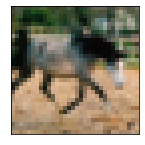

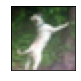

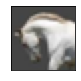

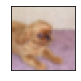

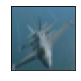

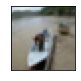

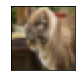

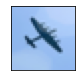

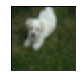

0

In [25]:
show_cifar10()

## Train Cifar-10 with your VGG-19

Epoch [1/4], Iter [100/781] Loss: 1.6041, iter_time: 229.05
Test Accuracy of the model on the 100 test images: 36 %
Epoch [1/4], Iter [200/781] Loss: 1.7843, iter_time: 312.70
Test Accuracy of the model on the 100 test images: 36 %
Epoch [1/4], Iter [300/781] Loss: 1.6326, iter_time: 344.74
Test Accuracy of the model on the 100 test images: 41 %
Epoch [1/4], Iter [400/781] Loss: 1.3251, iter_time: 304.09
Test Accuracy of the model on the 100 test images: 45 %
Epoch [1/4], Iter [500/781] Loss: 1.5653, iter_time: 312.34
Test Accuracy of the model on the 100 test images: 49 %
Epoch [1/4], Iter [600/781] Loss: 1.6692, iter_time: 317.95
Test Accuracy of the model on the 100 test images: 53 %
Epoch [1/4], Iter [700/781] Loss: 1.6548, iter_time: 316.10
Test Accuracy of the model on the 100 test images: 49 %


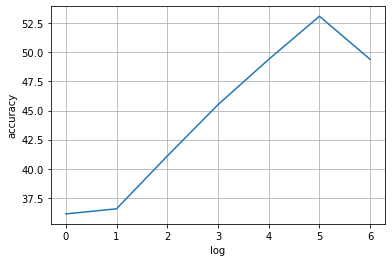

Epoch [2/4], Iter [100/781] Loss: 0.9031, iter_time: 526.43
Test Accuracy of the model on the 100 test images: 57 %
Epoch [2/4], Iter [200/781] Loss: 1.3810, iter_time: 291.42
Test Accuracy of the model on the 100 test images: 55 %
Epoch [2/4], Iter [300/781] Loss: 1.4337, iter_time: 287.89
Test Accuracy of the model on the 100 test images: 55 %
Epoch [2/4], Iter [400/781] Loss: 0.9031, iter_time: 287.96
Test Accuracy of the model on the 100 test images: 60 %
Epoch [2/4], Iter [500/781] Loss: 0.9661, iter_time: 287.37
Test Accuracy of the model on the 100 test images: 61 %
Epoch [2/4], Iter [600/781] Loss: 1.0917, iter_time: 286.71
Test Accuracy of the model on the 100 test images: 62 %
Epoch [2/4], Iter [700/781] Loss: 0.9736, iter_time: 286.25
Test Accuracy of the model on the 100 test images: 61 %


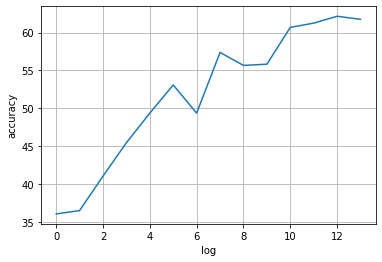

Epoch [3/4], Iter [100/781] Loss: 0.8995, iter_time: 471.26
Test Accuracy of the model on the 100 test images: 63 %
Epoch [3/4], Iter [200/781] Loss: 1.0093, iter_time: 287.30
Test Accuracy of the model on the 100 test images: 60 %
Epoch [3/4], Iter [300/781] Loss: 1.0240, iter_time: 287.06
Test Accuracy of the model on the 100 test images: 64 %
Epoch [3/4], Iter [400/781] Loss: 0.8458, iter_time: 287.49
Test Accuracy of the model on the 100 test images: 65 %
Epoch [3/4], Iter [500/781] Loss: 0.9936, iter_time: 287.30
Test Accuracy of the model on the 100 test images: 66 %
Epoch [3/4], Iter [600/781] Loss: 0.7930, iter_time: 286.61
Test Accuracy of the model on the 100 test images: 65 %
Epoch [3/4], Iter [700/781] Loss: 0.9978, iter_time: 288.34
Test Accuracy of the model on the 100 test images: 69 %


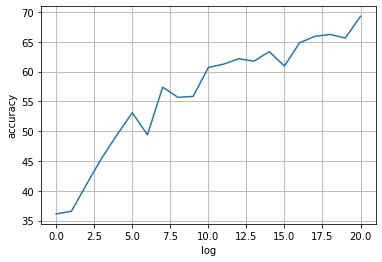

Epoch [4/4], Iter [100/781] Loss: 0.7096, iter_time: 471.26
Test Accuracy of the model on the 100 test images: 71 %
Epoch [4/4], Iter [200/781] Loss: 0.5967, iter_time: 288.05
Test Accuracy of the model on the 100 test images: 68 %
Epoch [4/4], Iter [300/781] Loss: 0.7077, iter_time: 287.35
Test Accuracy of the model on the 100 test images: 70 %
Epoch [4/4], Iter [400/781] Loss: 0.8352, iter_time: 287.55
Test Accuracy of the model on the 100 test images: 69 %
Epoch [4/4], Iter [500/781] Loss: 0.6845, iter_time: 287.83
Test Accuracy of the model on the 100 test images: 70 %
Epoch [4/4], Iter [600/781] Loss: 0.5559, iter_time: 287.64
Test Accuracy of the model on the 100 test images: 72 %
Epoch [4/4], Iter [700/781] Loss: 0.6396, iter_time: 287.96
Test Accuracy of the model on the 100 test images: 69 %


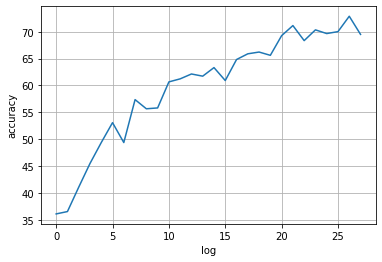

In [29]:
import torchvision.models as models
#vgg19 = models.vgg19_bn(pretrained=False)
vgg19 = VGG19()

tell_time = Timer()
iter_time = 0

vgg19 = vgg19#.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg19.parameters(), lr=learning_rate)

accuracy_list = []
for epoch in range(num_epochs):
    vgg19.train()
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)#.cuda()
        labels = Variable(labels)#.cuda()

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = vgg19(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            accuracy_list = test_on_cifar10(vgg19, accuracy_list)

    loss_plot(accuracy_list)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
def cf_matrix(model, test_loader=test_loader):
    nb_classes = 10
    confusion_matrix = np.zeros((nb_classes, nb_classes))
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(test_loader):
            #inputs = inputs.to(DEVICE)
            #classes = classes.to(DEVICE)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for t, p in zip(classes.view(-1), preds.view(-1)):
                    confusion_matrix[t.long(), p.long()] += 1

    plt.figure(figsize=(15,10))

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

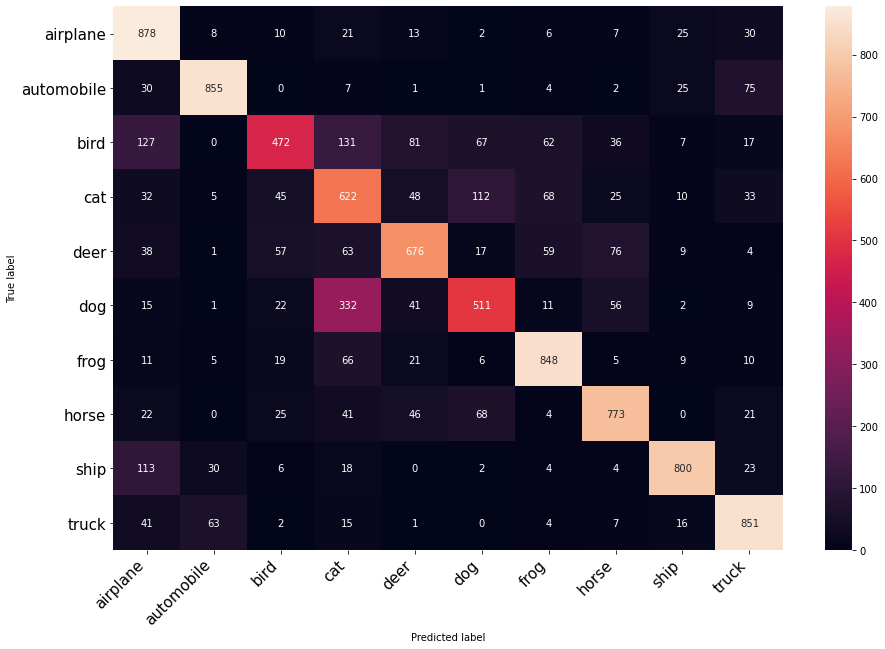

In [37]:
cf_matrix(model=vgg19, test_loader=test_loader)

## Train Cifar-10 with pre-trained VGG-19

In [38]:
import torchvision.models as models
pre_vgg=models.vgg19_bn(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /Users/kwonsoonjae/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


In [39]:
class pretrained_vgg(nn.Module):
    def __init__(self, pre_vgg):
        super(pretrained_vgg, self).__init__()
        self.features = nn.Sequential(   
            *list(pre_vgg.features.children())
        )
        self.linear = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    def forward(self, x):
        out = self.features(x).squeeze()
        out = self.linear(out)
        return out

Epoch [1/4], Iter [100/781] Loss: 0.5651, iter_time: 255.21
Test Accuracy of the model on the 100 test images: 80 %
Epoch [1/4], Iter [200/781] Loss: 0.8092, iter_time: 307.35
Test Accuracy of the model on the 100 test images: 76 %
Epoch [1/4], Iter [300/781] Loss: 0.4813, iter_time: 322.36
Test Accuracy of the model on the 100 test images: 77 %
Epoch [1/4], Iter [400/781] Loss: 0.6256, iter_time: 316.71
Test Accuracy of the model on the 100 test images: 80 %
Epoch [1/4], Iter [500/781] Loss: 0.4983, iter_time: 331.60
Test Accuracy of the model on the 100 test images: 82 %
Epoch [1/4], Iter [600/781] Loss: 0.6037, iter_time: 320.48
Test Accuracy of the model on the 100 test images: 85 %
Epoch [1/4], Iter [700/781] Loss: 0.4511, iter_time: 315.84
Test Accuracy of the model on the 100 test images: 83 %


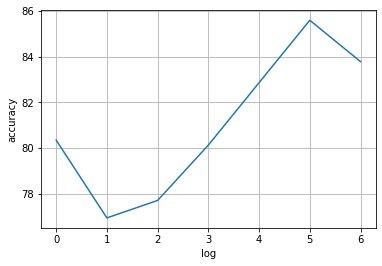

Epoch [2/4], Iter [100/781] Loss: 0.2643, iter_time: 525.67
Test Accuracy of the model on the 100 test images: 87 %
Epoch [2/4], Iter [200/781] Loss: 0.4344, iter_time: 316.80
Test Accuracy of the model on the 100 test images: 82 %
Epoch [2/4], Iter [300/781] Loss: 0.2871, iter_time: 323.27
Test Accuracy of the model on the 100 test images: 85 %
Epoch [2/4], Iter [400/781] Loss: 0.2886, iter_time: 318.62
Test Accuracy of the model on the 100 test images: 84 %
Epoch [2/4], Iter [500/781] Loss: 0.2451, iter_time: 319.06
Test Accuracy of the model on the 100 test images: 84 %
Epoch [2/4], Iter [600/781] Loss: 0.5461, iter_time: 309.24
Test Accuracy of the model on the 100 test images: 84 %
Epoch [2/4], Iter [700/781] Loss: 0.4719, iter_time: 301.65
Test Accuracy of the model on the 100 test images: 86 %


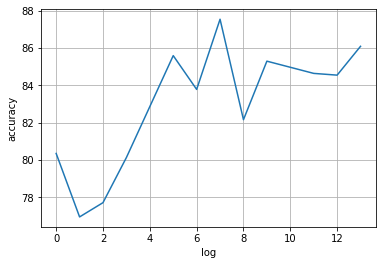

Epoch [3/4], Iter [100/781] Loss: 0.3821, iter_time: 452.68
Test Accuracy of the model on the 100 test images: 88 %
Epoch [3/4], Iter [200/781] Loss: 0.2762, iter_time: 274.10
Test Accuracy of the model on the 100 test images: 87 %
Epoch [3/4], Iter [300/781] Loss: 0.3619, iter_time: 274.46
Test Accuracy of the model on the 100 test images: 84 %
Epoch [3/4], Iter [400/781] Loss: 0.2702, iter_time: 274.08
Test Accuracy of the model on the 100 test images: 86 %
Epoch [3/4], Iter [500/781] Loss: 0.2666, iter_time: 274.17
Test Accuracy of the model on the 100 test images: 86 %
Epoch [3/4], Iter [600/781] Loss: 0.2460, iter_time: 274.11
Test Accuracy of the model on the 100 test images: 86 %
Epoch [3/4], Iter [700/781] Loss: 0.2139, iter_time: 274.65
Test Accuracy of the model on the 100 test images: 87 %


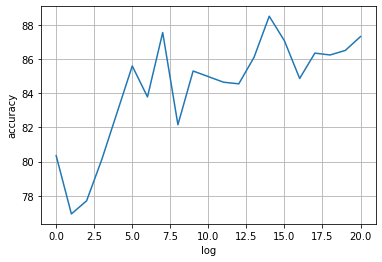

Epoch [4/4], Iter [100/781] Loss: 0.1012, iter_time: 452.74
Test Accuracy of the model on the 100 test images: 88 %
Epoch [4/4], Iter [200/781] Loss: 0.0504, iter_time: 275.18
Test Accuracy of the model on the 100 test images: 86 %
Epoch [4/4], Iter [300/781] Loss: 0.0524, iter_time: 274.32
Test Accuracy of the model on the 100 test images: 87 %
Epoch [4/4], Iter [400/781] Loss: 0.1600, iter_time: 275.24
Test Accuracy of the model on the 100 test images: 88 %
Epoch [4/4], Iter [500/781] Loss: 0.1565, iter_time: 275.72
Test Accuracy of the model on the 100 test images: 86 %
Epoch [4/4], Iter [600/781] Loss: 0.3246, iter_time: 274.39
Test Accuracy of the model on the 100 test images: 86 %
Epoch [4/4], Iter [700/781] Loss: 0.1622, iter_time: 275.88
Test Accuracy of the model on the 100 test images: 87 %


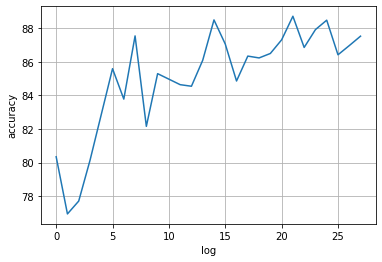

In [43]:
pre_vgg19 = pretrained_vgg(pre_vgg)

tell_time = Timer()
iter_time = 0

pre_vgg19 = pre_vgg19#.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(pre_vgg19.parameters(), lr=learning_rate)

accuracy_list = []
for epoch in range(num_epochs):
    pre_vgg19.train()
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)#.cuda()
        labels = Variable(labels)#.cuda()

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = pre_vgg19(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            accuracy_list = test_on_cifar10(pre_vgg19, accuracy_list)

    loss_plot(accuracy_list)

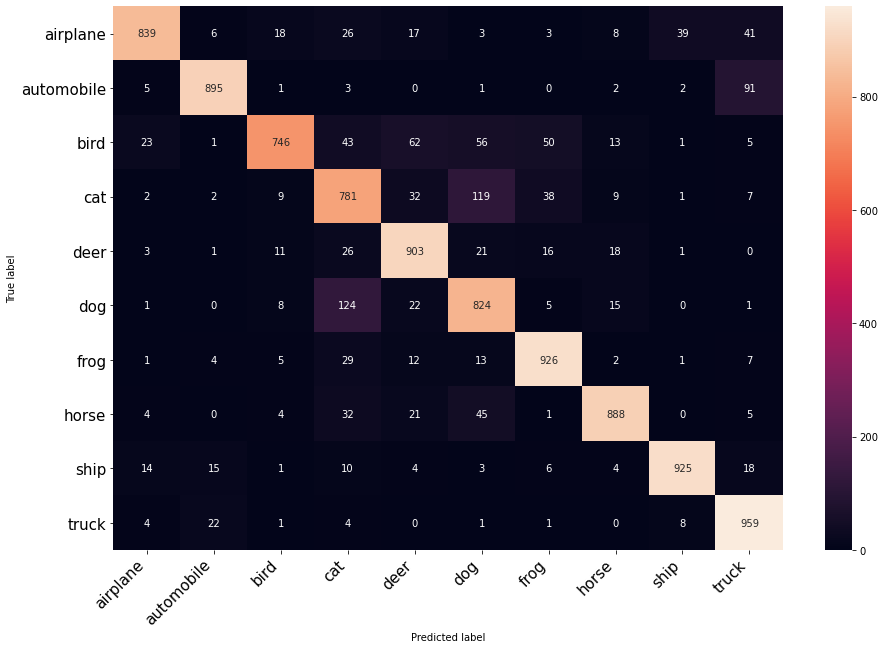

In [44]:
cf_matrix(model=pre_vgg19, test_loader=test_loader)

## Transfer Learning on Pre-trained VGG-19

In [120]:
class transfer_vgg(nn.Module):
    def __init__(self):
        super(transfer_vgg, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(1000, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 10),
        )
    def forward(self, x):
        #out = self.features(x).squeeze()
        out = self.linear(x)
        return out

In [93]:
def test_on_cifar10_trans(model, accuracy_list):  
    # Test the Model       
    model.eval()    # Change model to 'eval' mode (BN uses moving mean/var).
    correct = 0
    total = 0
    for j, (images, labels) in enumerate(pre_test_loader):
        images = Variable(images)#.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum()
        if (j+1)%100==0:
            break

    print('Test Accuracy of the model on the 100 test images: %d %%' % (100 * correct.float() / total))
    accuracy_list.append(100 * correct.float() / total) 
    return accuracy_list

In [108]:
pre_vgg = models.vgg19_bn(pretrained=True)

In [109]:
emb_train = np.empty((len(train_dataset), 1000))
emb_test = np.empty((len(test_dataset), 1000))

lab_train = np.empty(len(train_dataset))
lab_test = np.empty(len(test_dataset))

for i, (images, labels) in enumerate(train_loader):
    images = Variable(images)
    images = pre_vgg(images).squeeze()
    emb_train[len(images)*i : len(images)*(i+1)] = images.detach().numpy()
    labels = Variable(labels)
    lab_train[len(labels)*i : len(labels)*(i+1)] = labels.detach().numpy()

for i, (images, labels) in enumerate(test_loader):
    images = Variable(images)
    images = pre_vgg(images).squeeze()
    emb_test[len(images)*i : len(images)*(i+1)] = images.detach().numpy()
    labels = Variable(labels)
    lab_test[len(labels)*i : len(labels)*(i+1)] = labels.detach().numpy()

In [110]:
from torch.utils.data import TensorDataset, DataLoader

x_train = torch.from_numpy(emb_train).float()
y_train = torch.from_numpy(lab_train).long()
trains = TensorDataset(x_train, y_train)

x_test = torch.from_numpy(emb_test).float()
y_test = torch.from_numpy(lab_test).long()
test = TensorDataset(x_test, y_test)

In [117]:
pre_train_loader = torch.utils.data.DataLoader(dataset=trains,
                                           batch_size=batch_size, 
                                           shuffle=True)

pre_test_loader = torch.utils.data.DataLoader(dataset=test,
                                          batch_size=batch_size, 
                                          shuffle=True)

Epoch [1/4], Iter [100/781] Loss: 2.0647, iter_time: 0.75
Test Accuracy of the model on the 100 test images: 26 %
Epoch [1/4], Iter [200/781] Loss: 1.7395, iter_time: 0.95
Test Accuracy of the model on the 100 test images: 34 %
Epoch [1/4], Iter [300/781] Loss: 1.8531, iter_time: 0.93
Test Accuracy of the model on the 100 test images: 37 %
Epoch [1/4], Iter [400/781] Loss: 1.6901, iter_time: 0.87
Test Accuracy of the model on the 100 test images: 38 %
Epoch [1/4], Iter [500/781] Loss: 1.5289, iter_time: 0.90
Test Accuracy of the model on the 100 test images: 40 %
Epoch [1/4], Iter [600/781] Loss: 1.6207, iter_time: 0.90
Test Accuracy of the model on the 100 test images: 41 %
Epoch [1/4], Iter [700/781] Loss: 1.6244, iter_time: 0.92
Test Accuracy of the model on the 100 test images: 41 %


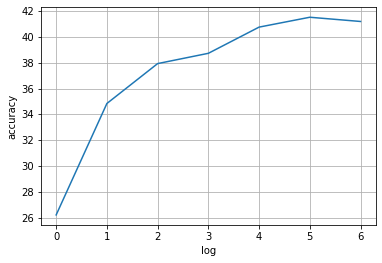

Epoch [2/4], Iter [100/781] Loss: 1.5520, iter_time: 1.61
Test Accuracy of the model on the 100 test images: 43 %
Epoch [2/4], Iter [200/781] Loss: 1.7942, iter_time: 1.05
Test Accuracy of the model on the 100 test images: 42 %
Epoch [2/4], Iter [300/781] Loss: 1.7969, iter_time: 0.88
Test Accuracy of the model on the 100 test images: 43 %
Epoch [2/4], Iter [400/781] Loss: 1.5447, iter_time: 0.91
Test Accuracy of the model on the 100 test images: 43 %
Epoch [2/4], Iter [500/781] Loss: 1.6100, iter_time: 0.93
Test Accuracy of the model on the 100 test images: 44 %
Epoch [2/4], Iter [600/781] Loss: 1.5271, iter_time: 0.91
Test Accuracy of the model on the 100 test images: 44 %
Epoch [2/4], Iter [700/781] Loss: 1.6734, iter_time: 0.90
Test Accuracy of the model on the 100 test images: 43 %


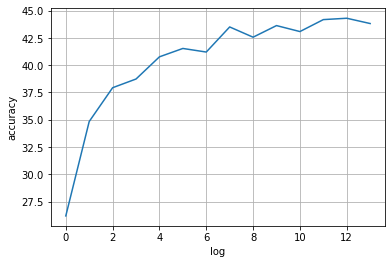

Epoch [3/4], Iter [100/781] Loss: 1.6167, iter_time: 1.59
Test Accuracy of the model on the 100 test images: 44 %
Epoch [3/4], Iter [200/781] Loss: 1.4130, iter_time: 0.95
Test Accuracy of the model on the 100 test images: 44 %
Epoch [3/4], Iter [300/781] Loss: 1.7231, iter_time: 0.95
Test Accuracy of the model on the 100 test images: 44 %
Epoch [3/4], Iter [400/781] Loss: 1.6071, iter_time: 0.86
Test Accuracy of the model on the 100 test images: 44 %
Epoch [3/4], Iter [500/781] Loss: 1.6341, iter_time: 0.97
Test Accuracy of the model on the 100 test images: 45 %
Epoch [3/4], Iter [600/781] Loss: 1.7588, iter_time: 0.90
Test Accuracy of the model on the 100 test images: 45 %
Epoch [3/4], Iter [700/781] Loss: 1.4477, iter_time: 0.89
Test Accuracy of the model on the 100 test images: 45 %


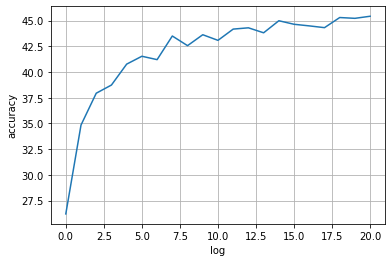

Epoch [4/4], Iter [100/781] Loss: 1.5092, iter_time: 1.62
Test Accuracy of the model on the 100 test images: 45 %
Epoch [4/4], Iter [200/781] Loss: 1.3648, iter_time: 0.94
Test Accuracy of the model on the 100 test images: 46 %
Epoch [4/4], Iter [300/781] Loss: 1.5333, iter_time: 0.91
Test Accuracy of the model on the 100 test images: 44 %
Epoch [4/4], Iter [400/781] Loss: 1.4316, iter_time: 0.88
Test Accuracy of the model on the 100 test images: 46 %
Epoch [4/4], Iter [500/781] Loss: 1.5161, iter_time: 0.86
Test Accuracy of the model on the 100 test images: 46 %
Epoch [4/4], Iter [600/781] Loss: 1.4208, iter_time: 0.96
Test Accuracy of the model on the 100 test images: 46 %
Epoch [4/4], Iter [700/781] Loss: 1.5246, iter_time: 1.05
Test Accuracy of the model on the 100 test images: 45 %


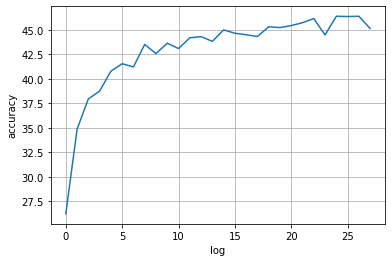

In [121]:
tell_time = Timer()
iter_time = 0

trans_vgg = transfer_vgg()#.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(trans_vgg.parameters(), lr=0.0001)

accuracy_list = []
for epoch in range(num_epochs):
    
    trans_vgg.train()
    for i, (images, labels) in enumerate(pre_train_loader):
        images = Variable(images)#.cuda()
        labels = Variable(labels)#.cuda()

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = trans_vgg(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, len(trains)//batch_size, loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            accuracy_list = test_on_cifar10_trans(trans_vgg, accuracy_list)

    loss_plot(accuracy_list)

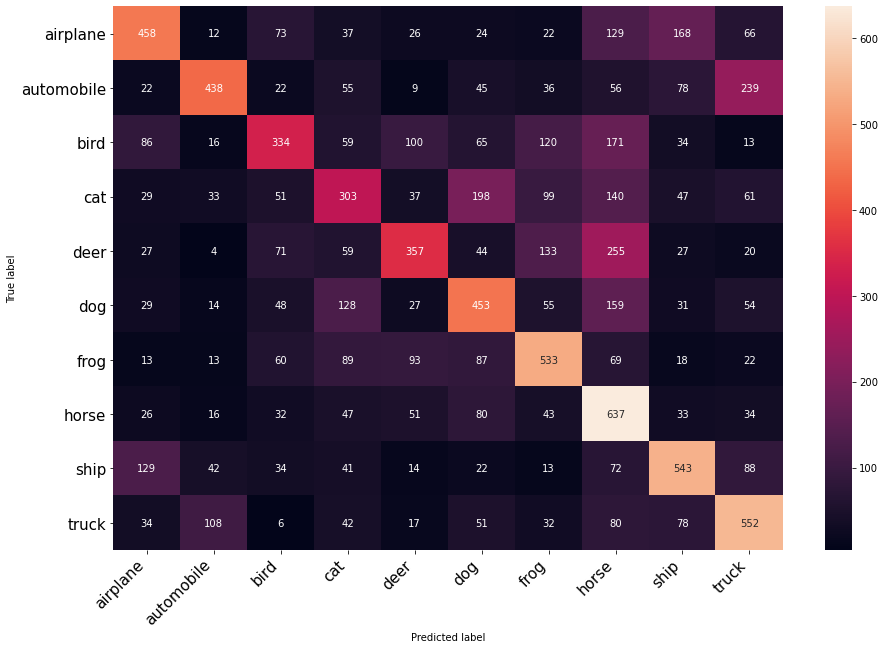

In [122]:
cf_matrix(model=trans_vgg, test_loader=pre_test_loader)

In [75]:
count_parameters(trans_vgg)

579466

In [76]:
count_parameters(pre_vgg)

143678248